In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit, KFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#!pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.losses import SparseCategoricalCrossentropy


%matplotlib inline

In [2]:
#Get the data
df_meteo_1 = pd.read_csv('datasets/meteo_202109-202112.csv')
df_meteo_2 = pd.read_csv('datasets/meteo_202201-202212.csv')
df_meteo_3 = pd.read_csv('datasets/meteo_202301-202304.csv')
df_energia_1 = pd.read_csv('datasets/energia_202109-202112.csv')
df_energia_2 = pd.read_csv('datasets/energia_202201-202212.csv')
df_energia_3 = pd.read_csv('datasets/energia_202301-202304.csv')
df_open_1 = pd.read_csv('datasets/open-meteo-202109-202212.csv', delimiter=',') # dataset de 2021 e 2022
df_open_2 = pd.read_csv('datasets/open-meteo-2023-extra.csv', delimiter=',') # dataset de 2023
df_open_3 = pd.read_csv('datasets/open-meteo-2023-missing.csv', delimiter=',') # dataset de 2023 para adicionar os missing values
df_submission = pd.read_csv('datasets/dummy_submission.csv')

### General Analysis

#### DataFrames Energia

<Axes: >

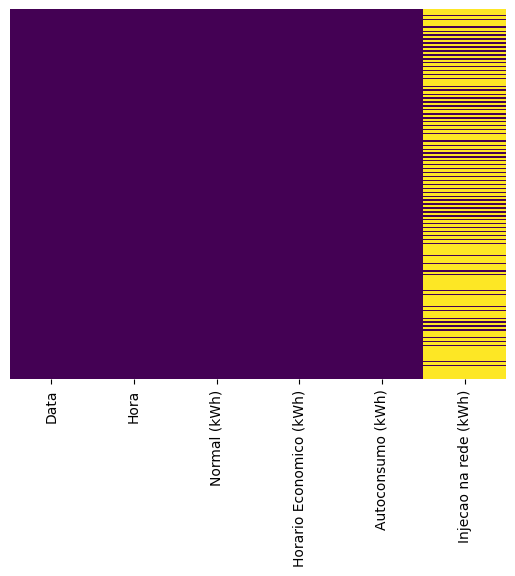

In [3]:
sns.heatmap(df_energia_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

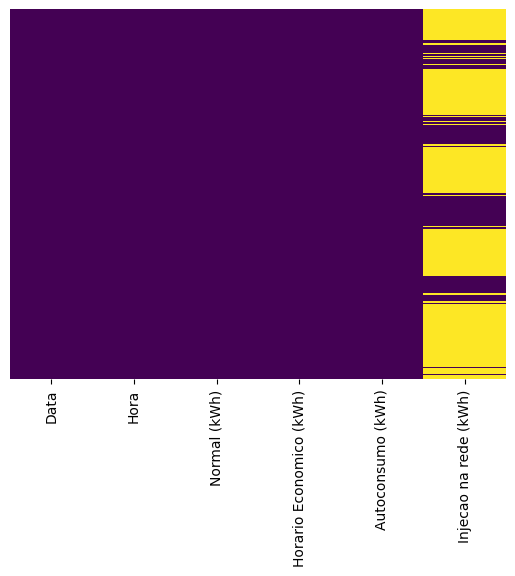

In [4]:
sns.heatmap(df_energia_2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

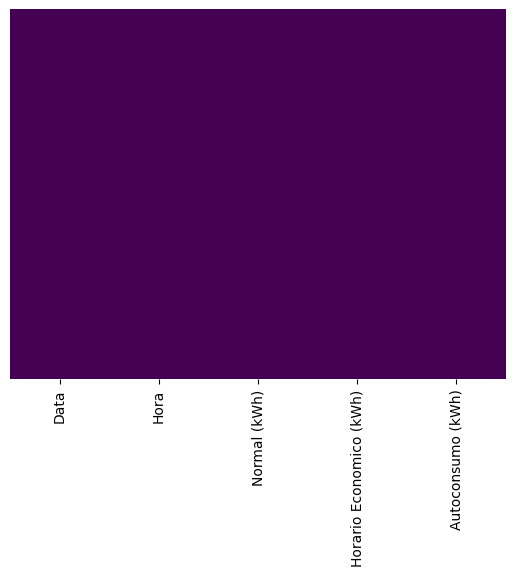

In [5]:
sns.heatmap(df_energia_3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df_energia_1.rename(columns={'Data': 'date', 'Hora': 'hour'}, inplace=True)
df_energia_1['Injecao na rede (kWh)'].replace({None: 'None', np.nan: 'None'}, inplace=True)
df_energia_1

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2021-09-29,0,0.000,0.000,0.0,None
1,2021-09-29,1,0.000,0.000,0.0,None
2,2021-09-29,2,0.000,0.000,0.0,None
3,2021-09-29,3,0.000,0.000,0.0,None
4,2021-09-29,4,0.000,0.000,0.0,None
...,...,...,...,...,...,...
2251,2021-12-31,19,2.176,0.000,0.0,None
2252,2021-12-31,20,0.732,0.000,0.0,None
2253,2021-12-31,21,0.704,0.000,0.0,None
2254,2021-12-31,22,0.000,0.424,0.0,None


In [7]:
df_energia_2.rename(columns={'Data': 'date', 'Hora': 'hour'}, inplace=True)
df_energia_2['Injecao na rede (kWh)'].replace({None: 'None', np.nan: 'None'}, inplace=True)
df_energia_2

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2022-01-01,0,0.000,0.486,0.0,None
1,2022-01-01,1,0.000,0.429,0.0,None
2,2022-01-01,2,0.000,0.463,0.0,None
3,2022-01-01,3,0.000,0.545,0.0,None
4,2022-01-01,4,0.000,0.439,0.0,None
...,...,...,...,...,...,...
8755,2022-12-31,19,1.693,0.000,0.0,None
8756,2022-12-31,20,1.327,0.000,0.0,None
8757,2022-12-31,21,0.757,0.000,0.0,None
8758,2022-12-31,22,0.000,0.675,0.0,None


In [8]:
df_energia_3.rename(columns={'Data': 'date', 'Hora': 'hour'}, inplace=True)
df_energia_3

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh)
0,2023-01-01,0,0.000,0.467,0.000
1,2023-01-01,1,0.000,0.577,0.000
2,2023-01-01,2,0.000,0.346,0.000
3,2023-01-01,3,0.000,0.270,0.000
4,2023-01-01,4,0.000,0.252,0.000
...,...,...,...,...,...
2251,2023-04-04,19,0.953,0.000,0.012
2252,2023-04-04,20,0.915,0.000,0.000
2253,2023-04-04,21,0.479,0.000,0.000
2254,2023-04-04,22,0.000,0.497,0.000


In [9]:
df_energia_3.columns

Index(['date', 'hour', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)'],
      dtype='object')

In [10]:
# Add Injecao na rede
df_energia_3['Injecao na rede (kWh)'] = 'None'
df_energia_3

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2023-01-01,0,0.000,0.467,0.000,None
1,2023-01-01,1,0.000,0.577,0.000,None
2,2023-01-01,2,0.000,0.346,0.000,None
3,2023-01-01,3,0.000,0.270,0.000,None
4,2023-01-01,4,0.000,0.252,0.000,None
...,...,...,...,...,...,...
2251,2023-04-04,19,0.953,0.000,0.012,None
2252,2023-04-04,20,0.915,0.000,0.000,None
2253,2023-04-04,21,0.479,0.000,0.000,None
2254,2023-04-04,22,0.000,0.497,0.000,None


#### DataFrames Meteo

<Axes: >

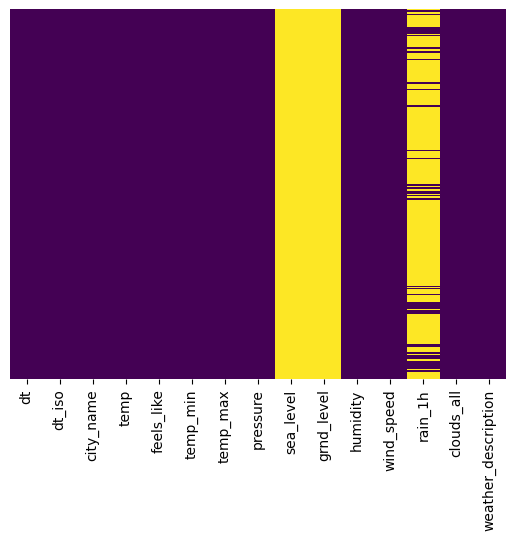

In [11]:
sns.heatmap(df_meteo_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

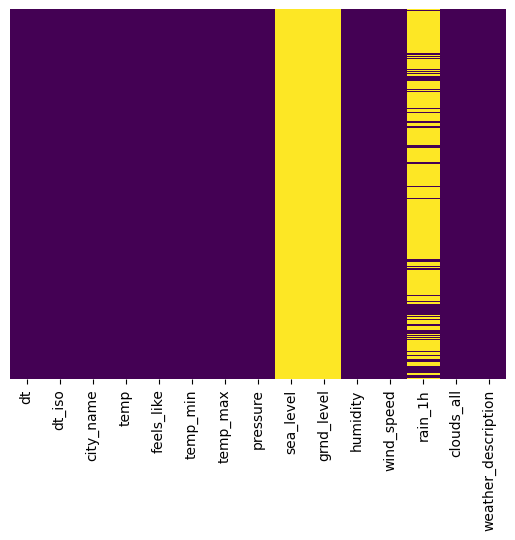

In [12]:
sns.heatmap(df_meteo_2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

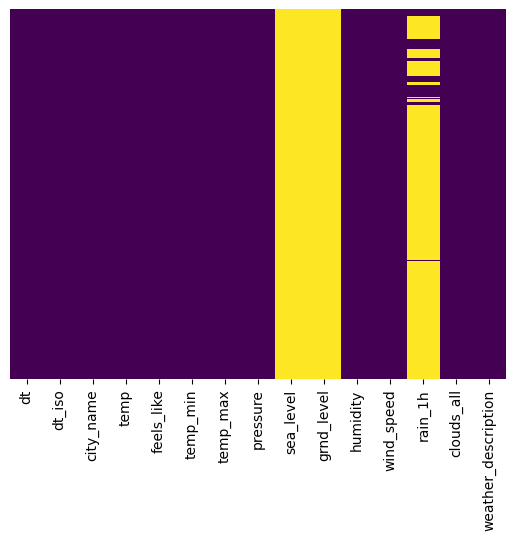

In [13]:
sns.heatmap(df_meteo_3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
# Convert column 'dt_iso' to datetime
df_meteo_1['dt_iso'] = pd.to_datetime(df_meteo_1['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Create new columns 'date' and 'hour'
df_meteo_1['date'] = df_meteo_1['dt_iso'].dt.strftime('%Y-%m-%d')
df_meteo_1['hour'] = df_meteo_1['dt_iso'].dt.hour

# Reorder columns
df_meteo_1 = df_meteo_1[['date', 'hour'] + [col for col in df_meteo_1.columns if col not in ['dt_iso', 'date', 'hour']]]

# Drop the columns 'sea_level,' 'grnd_level,', 'city_name' and 'weather_description' 
# in the 'df_meteo's datasets
df_meteo_1.drop(['sea_level', 'grnd_level', 'city_name', 'weather_description'], axis=1, inplace=True)

# Fill empty values of rain_1h
df_meteo_1['rain_1h'].fillna(0, inplace=True)

# Show DataFrame
df_meteo_1

,date,hour,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2021-09-01,0,1630454400,18.74,18.84,15.72,20.34,1015,83,1.18,0.00,78
1,2021-09-01,1,1630458000,18.73,18.83,15.72,20.34,1014,83,1.46,0.00,92
2,2021-09-01,2,1630461600,17.84,17.98,16.72,20.34,1014,88,1.05,0.00,91
3,2021-09-01,3,1630465200,18.27,18.40,16.68,20.34,1014,86,0.46,0.14,94
4,2021-09-01,4,1630468800,17.81,17.97,16.12,20.34,1013,89,0.93,1.26,95
...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2021-12-31,19,1640977200,16.72,16.35,16.22,17.79,1024,73,3.05,0.00,91
2924,2021-12-31,20,1640980800,16.54,16.10,15.67,17.23,1024,71,3.32,0.00,97
2925,2021-12-31,21,1640984400,15.71,15.09,15.66,16.22,1023,67,3.43,0.00,94
2926,2021-12-31,22,1640988000,16.59,15.98,16.21,16.72,1024,64,3.29,0.00,83


In [15]:
# Convert column 'dt_iso' to datetime
df_meteo_2['dt_iso'] = pd.to_datetime(df_meteo_2['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Create new columns 'date' and 'hour'
df_meteo_2['date'] = df_meteo_2['dt_iso'].dt.strftime('%Y-%m-%d')
df_meteo_2['hour'] = df_meteo_2['dt_iso'].dt.hour

# Reorder columns
df_meteo_2 = df_meteo_2[['date', 'hour'] + [col for col in df_meteo_2.columns if col not in ['dt_iso', 'date', 'hour']]]

# Drop the columns 'sea_level,' 'grnd_level,', 'city_name' and 'weather_description' 
# in the 'df_meteo's datasets
df_meteo_2.drop(['sea_level', 'grnd_level', 'city_name', 'weather_description'], axis=1, inplace=True)

# Fill empty values of rain_1h
df_meteo_2['rain_1h'].fillna(0, inplace=True)

# Show DataFrame
df_meteo_2

,date,hour,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2022-01-01,0,1640995200,16.59,16.00,16.21,16.72,1024,65,3.15,0.00,97
1,2022-01-01,1,1640998800,16.59,16.00,16.21,16.72,1024,65,3.14,0.00,58
2,2022-01-01,2,1641002400,16.59,16.03,15.67,16.72,1024,66,3.12,0.00,23
3,2022-01-01,3,1641006000,13.59,12.75,11.61,16.16,1023,67,3.08,0.00,22
4,2022-01-01,4,1641009600,14.97,14.27,14.72,15.66,1023,67,3.12,0.00,15
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31,19,1672513200,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100
8756,2022-12-31,20,1672516800,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100
8757,2022-12-31,21,1672520400,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100
8758,2022-12-31,22,1672524000,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100


In [16]:
# Convert column 'dt_iso' to datetime
df_meteo_3['dt_iso'] = pd.to_datetime(df_meteo_3['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Create new columns 'date' and 'hour'
df_meteo_3['date'] = df_meteo_3['dt_iso'].dt.strftime('%Y-%m-%d')
df_meteo_3['hour'] = df_meteo_3['dt_iso'].dt.hour

# Reorder columns
df_meteo_3 = df_meteo_3[['date', 'hour'] + [col for col in df_meteo_3.columns if col not in ['dt_iso', 'date', 'hour']]]

# Drop the columns 'sea_level,' 'grnd_level,', 'city_name' and 'weather_description' 
# in the 'df_meteo's datasets
df_meteo_3.drop(['sea_level', 'grnd_level', 'city_name', 'weather_description'], axis=1, inplace=True)

# Fill empty values of rain_1h
df_meteo_3['rain_1h'].fillna(0, inplace=True)

# Show DataFrame
df_meteo_3

,date,hour,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2023-01-01,0,1672531200,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100
1,2023-01-01,1,1672534800,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100
2,2023-01-01,2,1672538400,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100
3,2023-01-01,3,1672542000,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100
4,2023-01-01,4,1672545600,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100
...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2023-03-14,19,1678820400,13.10,12.27,12.72,13.60,1024,69,1.87,0.00,96
1748,2023-03-14,20,1678824000,12.30,11.83,10.72,12.88,1023,86,1.03,0.00,84
1749,2023-03-14,21,1678827600,11.77,11.30,10.26,12.88,1023,88,1.03,0.00,84
1750,2023-03-14,22,1678831200,10.68,10.13,9.15,12.32,1023,89,1.03,0.00,84


In [17]:
len(df_meteo_1)

2928

In [18]:
len(df_meteo_2)

8760

In [19]:
len(df_meteo_3)

1752

In [20]:
len(df_energia_1)

2256

In [21]:
len(df_energia_2)

8760

In [22]:
len(df_energia_3)

2256

### The best way to concatenate the data is year by year

#### Data Concatenation 2021

In [23]:
# Merging by date and hour
df_merged_1 = pd.merge(df_energia_1, df_meteo_1, on=['date', 'hour'], how='inner')
df_merged_1['date'] = pd.to_datetime(df_merged_1['date'], format='%Y-%m-%d')

# Exibir o DataFrame resultante
df_merged_1

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2021-09-29,0,0.000,0.000,0.0,None,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,0.0,87
1,2021-09-29,1,0.000,0.000,0.0,None,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,0.0,91
2,2021-09-29,2,0.000,0.000,0.0,None,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,0.0,93
3,2021-09-29,3,0.000,0.000,0.0,None,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,0.0,95
4,2021-09-29,4,0.000,0.000,0.0,None,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,0.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2021-12-31,19,2.176,0.000,0.0,None,1640977200,16.72,16.35,16.22,17.79,1024,73,3.05,0.0,91
2252,2021-12-31,20,0.732,0.000,0.0,None,1640980800,16.54,16.10,15.67,17.23,1024,71,3.32,0.0,97
2253,2021-12-31,21,0.704,0.000,0.0,None,1640984400,15.71,15.09,15.66,16.22,1023,67,3.43,0.0,94
2254,2021-12-31,22,0.000,0.424,0.0,None,1640988000,16.59,15.98,16.21,16.72,1024,64,3.29,0.0,83


In [24]:
df_merged_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     2256 non-null   datetime64[ns]
 1   hour                     2256 non-null   int64         
 2   Normal (kWh)             2256 non-null   float64       
 3   Horario Economico (kWh)  2256 non-null   float64       
 4   Autoconsumo (kWh)        2256 non-null   float64       
 5   Injecao na rede (kWh)    2256 non-null   object        
 6   dt                       2256 non-null   int64         
 7   temp                     2256 non-null   float64       
 8   feels_like               2256 non-null   float64       
 9   temp_min                 2256 non-null   float64       
 10  temp_max                 2256 non-null   float64       
 11  pressure                 2256 non-null   int64         
 12  humidity                 2256 non-

In [25]:
# Count NULL values for each column
print(df_merged_1.isnull().sum())

date                       0
hour                       0
Normal (kWh)               0
Horario Economico (kWh)    0
Autoconsumo (kWh)          0
Injecao na rede (kWh)      0
dt                         0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
humidity                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
dtype: int64


In [26]:
# Count unique values for each column
print(df_merged_1.nunique())

date                         94
hour                         24
Normal (kWh)                772
Horario Economico (kWh)     329
Autoconsumo (kWh)           440
Injecao na rede (kWh)         5
dt                         2256
temp                       1023
feels_like                 1214
temp_min                    245
temp_max                    229
pressure                     35
humidity                     68
wind_speed                  554
rain_1h                     150
clouds_all                  101
dtype: int64


#### Data Concatenation 2022

In [27]:
# Merging by date and hour
df_merged_2 = pd.merge(df_energia_2, df_meteo_2, on=['date', 'hour'], how='inner')
df_merged_2['date'] = pd.to_datetime(df_merged_2['date'], format='%Y-%m-%d')

# Exibir o DataFrame resultante
df_merged_2

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2022-01-01,0,0.000,0.486,0.0,None,1640995200,16.59,16.00,16.21,16.72,1024,65,3.15,0.00,97
1,2022-01-01,1,0.000,0.429,0.0,None,1640998800,16.59,16.00,16.21,16.72,1024,65,3.14,0.00,58
2,2022-01-01,2,0.000,0.463,0.0,None,1641002400,16.59,16.03,15.67,16.72,1024,66,3.12,0.00,23
3,2022-01-01,3,0.000,0.545,0.0,None,1641006000,13.59,12.75,11.61,16.16,1023,67,3.08,0.00,22
4,2022-01-01,4,0.000,0.439,0.0,None,1641009600,14.97,14.27,14.72,15.66,1023,67,3.12,0.00,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31,19,1.693,0.000,0.0,None,1672513200,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100
8756,2022-12-31,20,1.327,0.000,0.0,None,1672516800,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100
8757,2022-12-31,21,0.757,0.000,0.0,None,1672520400,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100
8758,2022-12-31,22,0.000,0.675,0.0,None,1672524000,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100


In [28]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     8760 non-null   datetime64[ns]
 1   hour                     8760 non-null   int64         
 2   Normal (kWh)             8760 non-null   float64       
 3   Horario Economico (kWh)  8760 non-null   float64       
 4   Autoconsumo (kWh)        8760 non-null   float64       
 5   Injecao na rede (kWh)    8760 non-null   object        
 6   dt                       8760 non-null   int64         
 7   temp                     8760 non-null   float64       
 8   feels_like               8760 non-null   float64       
 9   temp_min                 8760 non-null   float64       
 10  temp_max                 8760 non-null   float64       
 11  pressure                 8760 non-null   int64         
 12  humidity                 8760 non-

In [29]:
# Count NULL values for each column
print(df_merged_2.isnull().sum())

date                       0
hour                       0
Normal (kWh)               0
Horario Economico (kWh)    0
Autoconsumo (kWh)          0
Injecao na rede (kWh)      0
dt                         0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
humidity                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
dtype: int64


In [30]:
# Count unique values for each column
print(df_merged_2.nunique())

date                        365
hour                         24
Normal (kWh)               1132
Horario Economico (kWh)     789
Autoconsumo (kWh)           712
Injecao na rede (kWh)         5
dt                         8760
temp                       2277
feels_like                 2585
temp_min                    424
temp_max                    511
pressure                     41
humidity                     82
wind_speed                  761
rain_1h                     348
clouds_all                  101
dtype: int64


#### Data Concatenation 2023

In [31]:
df_energia_3

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh)
0,2023-01-01,0,0.000,0.467,0.000,None
1,2023-01-01,1,0.000,0.577,0.000,None
2,2023-01-01,2,0.000,0.346,0.000,None
3,2023-01-01,3,0.000,0.270,0.000,None
4,2023-01-01,4,0.000,0.252,0.000,None
...,...,...,...,...,...,...
2251,2023-04-04,19,0.953,0.000,0.012,None
2252,2023-04-04,20,0.915,0.000,0.000,None
2253,2023-04-04,21,0.479,0.000,0.000,None
2254,2023-04-04,22,0.000,0.497,0.000,None


In [32]:
df_meteo_3

,date,hour,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2023-01-01,0,1672531200,12.93,12.76,12.72,13.43,1019,95,2.02,3.72,100
1,2023-01-01,1,1672534800,13.49,13.38,13.43,13.90,1018,95,2.18,3.26,100
2,2023-01-01,2,1672538400,13.55,13.44,13.48,14.82,1017,95,2.88,2.44,100
3,2023-01-01,3,1672542000,13.61,13.51,12.01,14.82,1016,95,3.63,1.74,100
4,2023-01-01,4,1672545600,13.59,13.49,12.01,14.82,1015,95,4.58,1.13,100
...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2023-03-14,19,1678820400,13.10,12.27,12.72,13.60,1024,69,1.87,0.00,96
1748,2023-03-14,20,1678824000,12.30,11.83,10.72,12.88,1023,86,1.03,0.00,84
1749,2023-03-14,21,1678827600,11.77,11.30,10.26,12.88,1023,88,1.03,0.00,84
1750,2023-03-14,22,1678831200,10.68,10.13,9.15,12.32,1023,89,1.03,0.00,84


In [33]:
df_merged_3 = pd.merge(df_energia_3, df_meteo_3, on=['date', 'hour'], how='left')
df_merged_3['date'] = pd.to_datetime(df_merged_3['date'], format='%Y-%m-%d')

df_merged_3.fillna(0, inplace=True)  # Replace NaN values with 0

print(f"Number of rows in merged DataFrame df3: {len(df_merged_3)}")
df_merged_3

Number of rows in merged DataFrame df3: 2256


,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2023-01-01,0,0.000,0.467,0.000,None,1.672531e+09,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0
1,2023-01-01,1,0.000,0.577,0.000,None,1.672535e+09,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0
2,2023-01-01,2,0.000,0.346,0.000,None,1.672538e+09,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0
3,2023-01-01,3,0.000,0.270,0.000,None,1.672542e+09,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0
4,2023-01-01,4,0.000,0.252,0.000,None,1.672546e+09,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2023-04-04,19,0.953,0.000,0.012,None,0.000000e+00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
2252,2023-04-04,20,0.915,0.000,0.000,None,0.000000e+00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
2253,2023-04-04,21,0.479,0.000,0.000,None,0.000000e+00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0
2254,2023-04-04,22,0.000,0.497,0.000,None,0.000000e+00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0


In [34]:
df_merged_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     2256 non-null   datetime64[ns]
 1   hour                     2256 non-null   int64         
 2   Normal (kWh)             2256 non-null   float64       
 3   Horario Economico (kWh)  2256 non-null   float64       
 4   Autoconsumo (kWh)        2256 non-null   float64       
 5   Injecao na rede (kWh)    2256 non-null   object        
 6   dt                       2256 non-null   float64       
 7   temp                     2256 non-null   float64       
 8   feels_like               2256 non-null   float64       
 9   temp_min                 2256 non-null   float64       
 10  temp_max                 2256 non-null   float64       
 11  pressure                 2256 non-null   float64       
 12  humidity                 2256 non-

In [35]:
# Count NULL values for each column
print(df_merged_3.isnull().sum())

date                       0
hour                       0
Normal (kWh)               0
Horario Economico (kWh)    0
Autoconsumo (kWh)          0
Injecao na rede (kWh)      0
dt                         0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
humidity                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
dtype: int64


In [36]:
# Count unique values for each column
print(df_merged_3.nunique())

date                         94
hour                         24
Normal (kWh)                709
Horario Economico (kWh)     490
Autoconsumo (kWh)           485
Injecao na rede (kWh)         1
dt                         1753
temp                        890
feels_like                 1008
temp_min                    170
temp_max                    175
pressure                     32
humidity                     72
wind_speed                  513
rain_1h                     121
clouds_all                   99
dtype: int64


### Summary of concatenated Data



Columns of the 2021 - Concatenated Data dataset:
Index(['date', 'hour', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injecao na rede (kWh)', 'dt', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all'],
      dtype='object')


Information for the 2021 - Concatenated Data dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     2256 non-null   datetime64[ns]
 1   hour                     2256 non-null   int64         
 2   Normal (kWh)             2256 non-null   float64       
 3   Horario Economico (kWh)  2256 non-null   float64       
 4   Autoconsumo (kWh)        2256 non-null   float64       
 5   Injecao na rede (kWh)    2256 non-null   object        
 6   dt                    

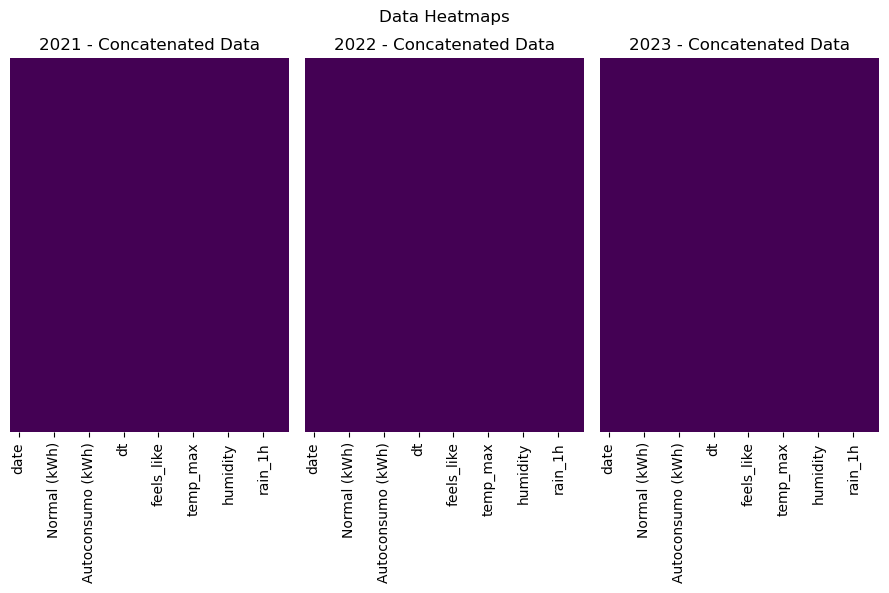

In [37]:
# Define datasets and their corresponding names
datasets = [
    (df_merged_1, '2021 - Concatenated Data'),
    (df_merged_2, '2022 - Concatenated Data'),
    (df_merged_2, '2023 - Concatenated Data')
]


# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(9, 6))
fig.suptitle("Data Heatmaps")

# Loop to load and display information and create heatmaps for each dataset
for i, (data, dataset_name) in enumerate(datasets):
    print("\n")
    print(f"Columns of the {dataset_name} dataset:")
    print(data.columns)
    print("\n")
    print(f"Information for the {dataset_name} dataset:")
    print(data.info())
    print("\n")
    print(f"First few rows of the {dataset_name} dataset:")
    print(data.head())
    print("\n")
    print(f"Number of missing values in the {dataset_name} dataset:")
    print(data.isnull().sum())
    print("\n")
    print("Nunique:\n")
    print(data.nunique())
    print("--------------------------------------------------------------------")

    # Create heatmap
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis', ax=axes[i])
    axes[i].set_title(dataset_name)

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


### Data Treatment of data from OpenMeteo

In [38]:
df_open_1

,time,cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),sunshine_duration (s),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2021-09-29T00:00,23,0,0,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-29T01:00,22,0,0,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29T02:00,23,0,0,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-29T03:00,14,0,0,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-29T04:00,11,0,0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31T19:00,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11012,2022-12-31T20:00,100,100,99,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11013,2022-12-31T21:00,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11014,2022-12-31T22:00,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_open_1['time'] = pd.to_datetime(df_open_1['time'], format='%Y-%m-%dT%H:%M')

df_open_1['date'] = df_open_1['time'].dt.date
df_open_1['hour'] = df_open_1['time'].dt.hour

df_open_1 = df_open_1[['date', 'hour'] + [col for col in df_open_1.columns if col not in ['date', 'hour']]]
df_open_1['date'] = pd.to_datetime(df_open_1['date'])

df_open_1 = df_open_1.drop('time', axis=1)

df_open_1

,date,hour,cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),sunshine_duration (s),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2021-09-29,0,23,0,0,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-29,1,22,0,0,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29,2,23,0,0,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-29,3,14,0,0,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-29,4,11,0,0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31,19,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11012,2022-12-31,20,100,100,99,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11013,2022-12-31,21,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11014,2022-12-31,22,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_open_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     11016 non-null  datetime64[ns]
 1   hour                                     11016 non-null  int32         
 2   cloud_cover (%)                          11016 non-null  int64         
 3   cloud_cover_low (%)                      11016 non-null  int64         
 4   cloud_cover_mid (%)                      11016 non-null  int64         
 5   cloud_cover_high (%)                     11016 non-null  int64         
 6   sunshine_duration (s)                    11016 non-null  float64       
 7   shortwave_radiation (W/m²)               11016 non-null  float64       
 8   direct_radiation (W/m²)                  11016 non-null  float64       
 9   diffuse_radiation (W/m²)               

In [41]:
df_open_2

,time,cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),sunshine_duration (s),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2023-01-01T00:00,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-01T01:00,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-01T02:00,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01T03:00,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-01T04:00,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2023-04-04T19:00,0,0,0,0,2102.5,59.0,35.0,24.0,270.4,121.7,0.0,0.0,0.0,0.0,0.0
2252,2023-04-04T20:00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,2023-04-04T21:00,2,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,2023-04-04T22:00,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_open_2['time'] = pd.to_datetime(df_open_2['time'], format='%Y-%m-%dT%H:%M')

df_open_2['date'] = df_open_2['time'].dt.date
df_open_2['hour'] = df_open_2['time'].dt.hour

df_open_2 = df_open_2[['date', 'hour'] + [col for col in df_open_2.columns if col not in ['date', 'hour']]]
df_open_2['date'] = pd.to_datetime(df_open_2['date'])

df_open_2 = df_open_2.drop('time', axis=1)

df_open_2

,date,hour,cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),sunshine_duration (s),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2023-01-01,0,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-01,1,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-01,2,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01,3,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-01,4,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2023-04-04,19,0,0,0,0,2102.5,59.0,35.0,24.0,270.4,121.7,0.0,0.0,0.0,0.0,0.0
2252,2023-04-04,20,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,2023-04-04,21,2,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,2023-04-04,22,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_open_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     2256 non-null   datetime64[ns]
 1   hour                                     2256 non-null   int32         
 2   cloud_cover (%)                          2256 non-null   int64         
 3   cloud_cover_low (%)                      2256 non-null   int64         
 4   cloud_cover_mid (%)                      2256 non-null   int64         
 5   cloud_cover_high (%)                     2256 non-null   int64         
 6   sunshine_duration (s)                    2256 non-null   float64       
 7   shortwave_radiation (W/m²)               2256 non-null   float64       
 8   direct_radiation (W/m²)                  2256 non-null   float64       
 9   diffuse_radiation (W/m²)                 

In [44]:
df_open_3

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),rain (mm),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (m/s)
0,2023-03-15T00:00,7.6,92,6.1,0.0,999.5,0,1.30
1,2023-03-15T01:00,6.7,94,4.8,0.0,998.9,2,1.63
2,2023-03-15T02:00,5.8,94,3.7,0.0,998.7,2,1.84
3,2023-03-15T03:00,5.2,94,3.1,0.0,998.1,5,1.50
4,2023-03-15T04:00,4.5,95,2.5,0.0,996.9,0,1.12
...,...,...,...,...,...,...,...,...
499,2023-04-04T19:00,20.1,35,18.1,0.0,992.6,0,1.20
500,2023-04-04T20:00,13.6,63,11.5,0.0,993.1,0,2.47
501,2023-04-04T21:00,12.6,67,10.6,0.0,993.9,2,2.22
502,2023-04-04T22:00,11.7,68,9.5,0.0,994.3,1,2.41


In [45]:
df_open_3['time'] = pd.to_datetime(df_open_3['time'], format='%Y-%m-%dT%H:%M')

df_open_3['date'] = df_open_3['time'].dt.date
df_open_3['hour'] = df_open_3['time'].dt.hour

df_open_3 = df_open_3[['date', 'hour'] + [col for col in df_open_3.columns if col not in ['date', 'hour']]]
df_open_3['date'] = pd.to_datetime(df_open_3['date'])

df_open_3 = df_open_3.drop('time', axis=1)

df_open_3

,date,hour,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),rain (mm),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (m/s)
0,2023-03-15,0,7.6,92,6.1,0.0,999.5,0,1.30
1,2023-03-15,1,6.7,94,4.8,0.0,998.9,2,1.63
2,2023-03-15,2,5.8,94,3.7,0.0,998.7,2,1.84
3,2023-03-15,3,5.2,94,3.1,0.0,998.1,5,1.50
4,2023-03-15,4,4.5,95,2.5,0.0,996.9,0,1.12
...,...,...,...,...,...,...,...,...,...
499,2023-04-04,19,20.1,35,18.1,0.0,992.6,0,1.20
500,2023-04-04,20,13.6,63,11.5,0.0,993.1,0,2.47
501,2023-04-04,21,12.6,67,10.6,0.0,993.9,2,2.22
502,2023-04-04,22,11.7,68,9.5,0.0,994.3,1,2.41


#### Calculate mean difference between temperature and temp_min and temp_max

In [46]:
# Calculate the mean difference between hourly_temperature and hourly_temperature_min
mean_difference_min_1 = (df_merged_1['temp'] - df_merged_1['temp_min']).mean()
mean_difference_min_2 = (df_merged_2['temp'] - df_merged_2['temp_min']).mean()
mean_difference_min_3 = (df_merged_3['temp'] - df_merged_3['temp_min']).mean()

mean_difference_min = (mean_difference_min_1 + mean_difference_min_2 + mean_difference_min_3) / 3

print(mean_difference_min)

# Calculate the mean difference between hourly_temperature and hourly_temperature_max
mean_difference_max_1 = (df_merged_1['temp_max'] - df_merged_1['temp']).mean()
mean_difference_max_2 = (df_merged_2['temp_max'] - df_merged_2['temp']).mean()
mean_difference_max_3 = (df_merged_3['temp_max'] - df_merged_3['temp']).mean()

mean_difference_max = (mean_difference_max_1 + mean_difference_max_2 + mean_difference_max_3) / 3

print(mean_difference_max)

1.5756027923507887
0.919201419249328


Insert new columns in DataFrame

In [47]:
temp_min = df_open_3['temperature_2m (°C)'] - mean_difference_min
temp_max = df_open_3['temperature_2m (°C)'] + mean_difference_max

df_open_3.insert(3, 'temp_min', temp_min)
df_open_3.insert(4, 'temp_max', temp_max)
df_open_3

,date,hour,temperature_2m (°C),temp_min,temp_max,relative_humidity_2m (%),apparent_temperature (°C),rain (mm),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (m/s)
0,2023-03-15,0,7.6,6.024397,8.519201,92,6.1,0.0,999.5,0,1.30
1,2023-03-15,1,6.7,5.124397,7.619201,94,4.8,0.0,998.9,2,1.63
2,2023-03-15,2,5.8,4.224397,6.719201,94,3.7,0.0,998.7,2,1.84
3,2023-03-15,3,5.2,3.624397,6.119201,94,3.1,0.0,998.1,5,1.50
4,2023-03-15,4,4.5,2.924397,5.419201,95,2.5,0.0,996.9,0,1.12
...,...,...,...,...,...,...,...,...,...,...,...
499,2023-04-04,19,20.1,18.524397,21.019201,35,18.1,0.0,992.6,0,1.20
500,2023-04-04,20,13.6,12.024397,14.519201,63,11.5,0.0,993.1,0,2.47
501,2023-04-04,21,12.6,11.024397,13.519201,67,10.6,0.0,993.9,2,2.22
502,2023-04-04,22,11.7,10.124397,12.619201,68,9.5,0.0,994.3,1,2.41


In [48]:
column_mapping = {
    'temperature_2m (°C)': 'temp',
    'relative_humidity_2m (%)': 'humidity',
    'apparent_temperature (°C)': 'feels_like',
    'rain (mm)': 'rain_1h',
    'surface_pressure (hPa)': 'pressure',
    'cloud_cover (%)': 'clouds_all',
    'wind_speed_10m (km/h)': 'wind_speed',
}

df_open_3.rename(columns=column_mapping, inplace=True)
df_open_3

,date,hour,temp,temp_min,temp_max,humidity,feels_like,rain_1h,pressure,clouds_all,wind_speed_10m (m/s)
0,2023-03-15,0,7.6,6.024397,8.519201,92,6.1,0.0,999.5,0,1.30
1,2023-03-15,1,6.7,5.124397,7.619201,94,4.8,0.0,998.9,2,1.63
2,2023-03-15,2,5.8,4.224397,6.719201,94,3.7,0.0,998.7,2,1.84
3,2023-03-15,3,5.2,3.624397,6.119201,94,3.1,0.0,998.1,5,1.50
4,2023-03-15,4,4.5,2.924397,5.419201,95,2.5,0.0,996.9,0,1.12
...,...,...,...,...,...,...,...,...,...,...,...
499,2023-04-04,19,20.1,18.524397,21.019201,35,18.1,0.0,992.6,0,1.20
500,2023-04-04,20,13.6,12.024397,14.519201,63,11.5,0.0,993.1,0,2.47
501,2023-04-04,21,12.6,11.024397,13.519201,67,10.6,0.0,993.9,2,2.22
502,2023-04-04,22,11.7,10.124397,12.619201,68,9.5,0.0,994.3,1,2.41


### Merge of 2021 and 2022 DataFrames

In [49]:
df_merged_12 = pd.concat([df_merged_1, df_merged_2], ignore_index=True)
df_merged_12

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2021-09-29,0,0.000,0.000,0.0,None,1632873600,13.97,13.54,11.45,14.04,1027,81,1.96,0.00,87
1,2021-09-29,1,0.000,0.000,0.0,None,1632877200,13.48,13.02,13.43,13.90,1028,82,1.83,0.00,91
2,2021-09-29,2,0.000,0.000,0.0,None,1632880800,12.93,12.47,12.72,13.43,1027,84,1.96,0.00,93
3,2021-09-29,3,0.000,0.000,0.0,None,1632884400,12.61,12.15,10.34,12.93,1027,85,1.85,0.00,95
4,2021-09-29,4,0.000,0.000,0.0,None,1632888000,12.61,12.17,9.79,12.93,1027,86,1.83,0.00,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31,19,1.693,0.000,0.0,None,1672513200,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100
11012,2022-12-31,20,1.327,0.000,0.0,None,1672516800,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100
11013,2022-12-31,21,0.757,0.000,0.0,None,1672520400,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100
11014,2022-12-31,22,0.000,0.675,0.0,None,1672524000,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100


In [50]:
df_open_1

,date,hour,cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),sunshine_duration (s),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2021-09-29,0,23,0,0,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-29,1,22,0,0,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29,2,23,0,0,77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-29,3,14,0,0,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-29,4,11,0,0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31,19,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11012,2022-12-31,20,100,100,99,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11013,2022-12-31,21,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11014,2022-12-31,22,100,100,100,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
value_counts = df_merged_12['Injecao na rede (kWh)'].value_counts(dropna=False)
print(value_counts)

Injecao na rede (kWh)
None         7777
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64


In [52]:
df = pd.merge(df_merged_12, df_open_1, on=['date', 'hour'], how='inner')
df

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,...,shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2021-09-29,0,0.000,0.000,0.0,None,1632873600,13.97,13.54,11.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-29,1,0.000,0.000,0.0,None,1632877200,13.48,13.02,13.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29,2,0.000,0.000,0.0,None,1632880800,12.93,12.47,12.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-29,3,0.000,0.000,0.0,None,1632884400,12.61,12.15,10.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-29,4,0.000,0.000,0.0,None,1632888000,12.61,12.17,9.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31,19,1.693,0.000,0.0,None,1672513200,15.70,15.57,15.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11012,2022-12-31,20,1.327,0.000,0.0,None,1672516800,15.55,15.43,12.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11013,2022-12-31,21,0.757,0.000,0.0,None,1672520400,13.45,13.28,12.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11014,2022-12-31,22,0.000,0.675,0.0,None,1672524000,12.93,12.73,12.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     11016 non-null  datetime64[ns]
 1   hour                                     11016 non-null  int64         
 2   Normal (kWh)                             11016 non-null  float64       
 3   Horario Economico (kWh)                  11016 non-null  float64       
 4   Autoconsumo (kWh)                        11016 non-null  float64       
 5   Injecao na rede (kWh)                    11016 non-null  object        
 6   dt                                       11016 non-null  int64         
 7   temp                                     11016 non-null  float64       
 8   feels_like                               11016 non-null  float64       
 9   temp_min                               

### Merge of 2023 DataFrames

In [54]:
matching_rows = df_merged_3[(df_merged_3['date'] == '2023-03-14') & (df_merged_3['hour'] == 23.0)]

split_index = matching_rows.index[0]

df_merged_3_before = df_merged_3.loc[:split_index]
df_merged_3_after = df_merged_3.loc[split_index + 1:]

In [55]:
df_merged_3_before

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2023-01-01,0,0.000,0.467,0.0,None,1.672531e+09,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,3.72,100.0
1,2023-01-01,1,0.000,0.577,0.0,None,1.672535e+09,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,3.26,100.0
2,2023-01-01,2,0.000,0.346,0.0,None,1.672538e+09,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,2.44,100.0
3,2023-01-01,3,0.000,0.270,0.0,None,1.672542e+09,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,1.74,100.0
4,2023-01-01,4,0.000,0.252,0.0,None,1.672546e+09,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,1.13,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2023-03-14,19,0.329,0.000,0.0,None,1.678820e+09,13.10,12.27,12.72,13.60,1024.0,69.0,1.87,0.00,96.0
1748,2023-03-14,20,0.401,0.000,0.0,None,1.678824e+09,12.30,11.83,10.72,12.88,1023.0,86.0,1.03,0.00,84.0
1749,2023-03-14,21,0.670,0.000,0.0,None,1.678828e+09,11.77,11.30,10.26,12.88,1023.0,88.0,1.03,0.00,84.0
1750,2023-03-14,22,0.000,0.558,0.0,None,1.678831e+09,10.68,10.13,9.15,12.32,1023.0,89.0,1.03,0.00,84.0


In [56]:
df_merged_3_after

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
1752,2023-03-15,0,0.000,0.502,0.000,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1753,2023-03-15,1,0.000,0.504,0.000,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1754,2023-03-15,2,0.000,0.494,0.000,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,2023-03-15,3,0.000,0.495,0.000,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1756,2023-03-15,4,0.000,0.349,0.000,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2023-04-04,19,0.953,0.000,0.012,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2252,2023-04-04,20,0.915,0.000,0.000,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,2023-04-04,21,0.479,0.000,0.000,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,2023-04-04,22,0.000,0.497,0.000,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df_merged_3_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 1752 to 2255
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     504 non-null    datetime64[ns]
 1   hour                     504 non-null    int64         
 2   Normal (kWh)             504 non-null    float64       
 3   Horario Economico (kWh)  504 non-null    float64       
 4   Autoconsumo (kWh)        504 non-null    float64       
 5   Injecao na rede (kWh)    504 non-null    object        
 6   dt                       504 non-null    float64       
 7   temp                     504 non-null    float64       
 8   feels_like               504 non-null    float64       
 9   temp_min                 504 non-null    float64       
 10  temp_max                 504 non-null    float64       
 11  pressure                 504 non-null    float64       
 12  humidity                 504 non

In [58]:
df_merged_3_after.set_index('date', inplace=True)
df_open_3.set_index('date', inplace=True)

df_merged_3_after.update(df_open_3)

df_merged_3_after.reset_index(inplace=True)

df_merged_3_after

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2023-03-15,0,0.000,0.502,0.000,None,0.0,7.6,6.1,6.024397,8.519201,999.5,92.0,0.0,0.0,0.0
1,2023-03-15,1,0.000,0.504,0.000,None,0.0,6.7,4.8,5.124397,7.619201,998.9,94.0,0.0,0.0,2.0
2,2023-03-15,2,0.000,0.494,0.000,None,0.0,5.8,3.7,4.224397,6.719201,998.7,94.0,0.0,0.0,2.0
3,2023-03-15,3,0.000,0.495,0.000,None,0.0,5.2,3.1,3.624397,6.119201,998.1,94.0,0.0,0.0,5.0
4,2023-03-15,4,0.000,0.349,0.000,None,0.0,4.5,2.5,2.924397,5.419201,996.9,95.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2023-04-04,19,0.953,0.000,0.012,None,0.0,20.1,18.1,18.524397,21.019201,992.6,35.0,0.0,0.0,0.0
500,2023-04-04,20,0.915,0.000,0.000,None,0.0,13.6,11.5,12.024397,14.519201,993.1,63.0,0.0,0.0,0.0
501,2023-04-04,21,0.479,0.000,0.000,None,0.0,12.6,10.6,11.024397,13.519201,993.9,67.0,0.0,0.0,2.0
502,2023-04-04,22,0.000,0.497,0.000,None,0.0,11.7,9.5,10.124397,12.619201,994.3,68.0,0.0,0.0,1.0


In [59]:
df_merged_3 = pd.concat([df_merged_3_before, df_merged_3_after], ignore_index=True)
df_merged_3

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2023-01-01,0,0.000,0.467,0.000,None,1.672531e+09,12.93,12.76,12.720000,13.430000,1019.0,95.0,2.02,3.72,100.0
1,2023-01-01,1,0.000,0.577,0.000,None,1.672535e+09,13.49,13.38,13.430000,13.900000,1018.0,95.0,2.18,3.26,100.0
2,2023-01-01,2,0.000,0.346,0.000,None,1.672538e+09,13.55,13.44,13.480000,14.820000,1017.0,95.0,2.88,2.44,100.0
3,2023-01-01,3,0.000,0.270,0.000,None,1.672542e+09,13.61,13.51,12.010000,14.820000,1016.0,95.0,3.63,1.74,100.0
4,2023-01-01,4,0.000,0.252,0.000,None,1.672546e+09,13.59,13.49,12.010000,14.820000,1015.0,95.0,4.58,1.13,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2023-04-04,19,0.953,0.000,0.012,None,0.000000e+00,20.10,18.10,18.524397,21.019201,992.6,35.0,0.00,0.00,0.0
2252,2023-04-04,20,0.915,0.000,0.000,None,0.000000e+00,13.60,11.50,12.024397,14.519201,993.1,63.0,0.00,0.00,0.0
2253,2023-04-04,21,0.479,0.000,0.000,None,0.000000e+00,12.60,10.60,11.024397,13.519201,993.9,67.0,0.00,0.00,2.0
2254,2023-04-04,22,0.000,0.497,0.000,None,0.000000e+00,11.70,9.50,10.124397,12.619201,994.3,68.0,0.00,0.00,1.0


In [60]:
df_merged_3 = pd.merge(df_merged_3, df_open_2, on=['date', 'hour'], how='inner')
df_merged_3

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,temp,feels_like,temp_min,...,shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2023-01-01,0,0.000,0.467,0.000,None,1.672531e+09,12.93,12.76,12.720000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-01,1,0.000,0.577,0.000,None,1.672535e+09,13.49,13.38,13.430000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-01,2,0.000,0.346,0.000,None,1.672538e+09,13.55,13.44,13.480000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-01,3,0.000,0.270,0.000,None,1.672542e+09,13.61,13.51,12.010000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-01,4,0.000,0.252,0.000,None,1.672546e+09,13.59,13.49,12.010000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2023-04-04,19,0.953,0.000,0.012,None,0.000000e+00,20.10,18.10,18.524397,...,59.0,35.0,24.0,270.4,121.7,0.0,0.0,0.0,0.0,0.0
2252,2023-04-04,20,0.915,0.000,0.000,None,0.000000e+00,13.60,11.50,12.024397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,2023-04-04,21,0.479,0.000,0.000,None,0.000000e+00,12.60,10.60,11.024397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,2023-04-04,22,0.000,0.497,0.000,None,0.000000e+00,11.70,9.50,10.124397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_merged_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     2256 non-null   datetime64[ns]
 1   hour                                     2256 non-null   int64         
 2   Normal (kWh)                             2256 non-null   float64       
 3   Horario Economico (kWh)                  2256 non-null   float64       
 4   Autoconsumo (kWh)                        2256 non-null   float64       
 5   Injecao na rede (kWh)                    2256 non-null   object        
 6   dt                                       2256 non-null   float64       
 7   temp                                     2256 non-null   float64       
 8   feels_like                               2256 non-null   float64       
 9   temp_min                                 

In [62]:
df.drop(['dt'], axis=1, inplace=True)
df_merged_3.drop(['dt'], axis=1, inplace=True)

Data Treatment terminated

## Models

### Feature Engineering, Decision Tree Pruning and Hyperparameter Tuning

<Axes: >

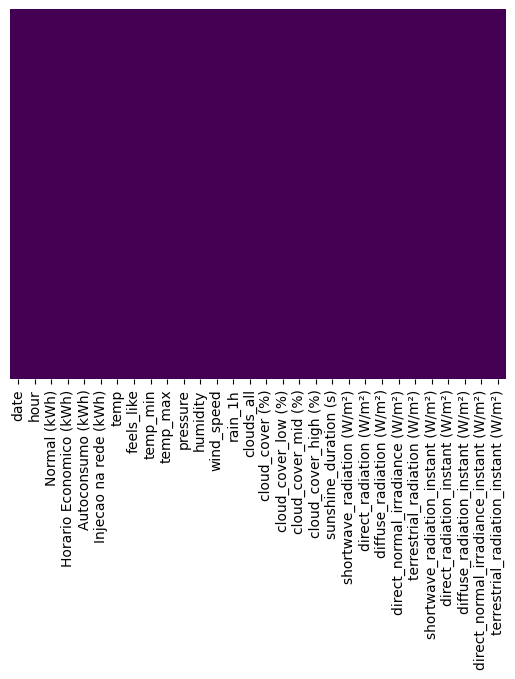

In [63]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


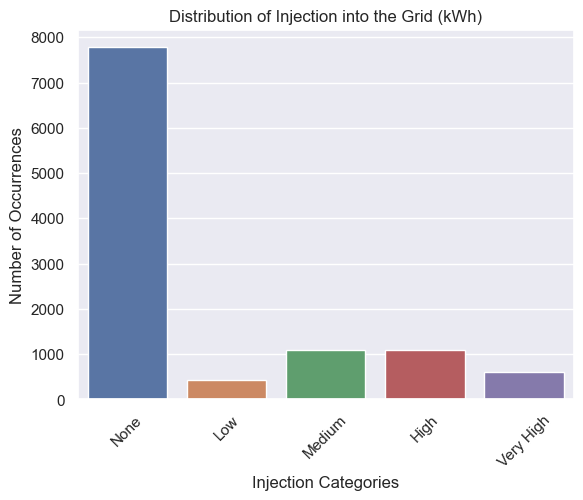

In [64]:
energia_count = df['Injecao na rede (kWh)'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=energia_count.index, y=energia_count.values, order=["None", "Low", "Medium", "High", "Very High"])
plt.title('Distribution of Injection into the Grid (kWh)')
plt.xlabel('Injection Categories', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45)
plt.show()

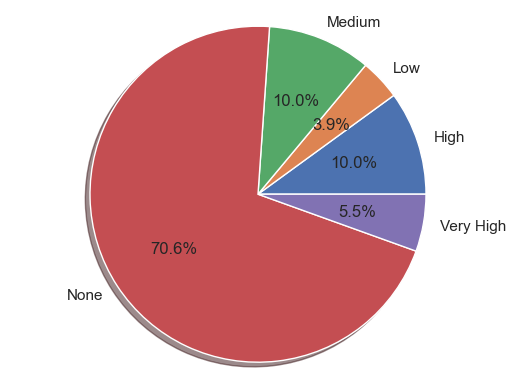

In [65]:
labels = df['Injecao na rede (kWh)'].astype('category').cat.categories.tolist()
counts = df['Injecao na rede (kWh)'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#### Replace Values

In [66]:
df_r1=df.copy()

In [67]:
replace_map = {'Injecao na rede (kWh)' : {'None': 0, 'Low' : 1, 'Medium': 2, 'High': 3, 'Very High': 4}}

In [68]:
labels = df_r1['Injecao na rede (kWh)'].astype('category').cat.categories.tolist()
replace_map_comp = {'Injecao na rede (kWh)' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'Injecao na rede (kWh)': {'High': 1, 'Low': 2, 'Medium': 3, 'None': 4, 'Very High': 5}}


In [69]:
df_r1.replace(replace_map_comp, inplace=True)

df_r1.head()

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,...,shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2021-09-29,0,0.0,0.0,0.0,4,13.97,13.54,11.45,14.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-29,1,0.0,0.0,0.0,4,13.48,13.02,13.43,13.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-29,2,0.0,0.0,0.0,4,12.93,12.47,12.72,13.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-29,3,0.0,0.0,0.0,4,12.61,12.15,10.34,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-29,4,0.0,0.0,0.0,4,12.61,12.17,9.79,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
print(df_r1['Injecao na rede (kWh)'].dtypes)

int64


#### Label Encoding

In [71]:
df_r2=df.copy()

In [72]:
print(df_r2.dtypes)

date                                       datetime64[ns]
hour                                                int64
Normal (kWh)                                      float64
Horario Economico (kWh)                           float64
Autoconsumo (kWh)                                 float64
Injecao na rede (kWh)                              object
temp                                              float64
feels_like                                        float64
temp_min                                          float64
temp_max                                          float64
pressure                                            int64
humidity                                            int64
wind_speed                                        float64
rain_1h                                           float64
clouds_all                                          int64
cloud_cover (%)                                     int64
cloud_cover_low (%)                                 int64
cloud_cover_mi

In [73]:
df_r2['None']= np.where(df_r2['Injecao na rede (kWh)'].str.contains('None'), 1, 0)
df_r2.head()

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,...,direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),None
0,2021-09-29,0,0.0,0.0,0.0,None,13.97,13.54,11.45,14.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2021-09-29,1,0.0,0.0,0.0,None,13.48,13.02,13.43,13.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2021-09-29,2,0.0,0.0,0.0,None,12.93,12.47,12.72,13.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2021-09-29,3,0.0,0.0,0.0,None,12.61,12.15,10.34,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2021-09-29,4,0.0,0.0,0.0,None,12.61,12.17,9.79,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [74]:
df_r2_skl = df.copy()
df_r22=df.copy()

from sklearn.preprocessing import LabelEncoder


lb_make = LabelEncoder()
df_r2_skl['Código de Injeção'] = lb_make.fit_transform(df_r22['Injecao na rede (kWh)'])

df_r2_skl.head()

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,...,direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),Código de Injeção
0,2021-09-29,0,0.0,0.0,0.0,None,13.97,13.54,11.45,14.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2021-09-29,1,0.0,0.0,0.0,None,13.48,13.02,13.43,13.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2021-09-29,2,0.0,0.0,0.0,None,12.93,12.47,12.72,13.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2021-09-29,3,0.0,0.0,0.0,None,12.61,12.15,10.34,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,2021-09-29,4,0.0,0.0,0.0,None,12.61,12.17,9.79,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [75]:
df_r1dt = df_r1.copy()

In [76]:
df_r1dt['date'].head()

0   2021-09-29
1   2021-09-29
2   2021-09-29
3   2021-09-29
4   2021-09-29
Name: date, dtype: datetime64[ns]

In [77]:
df_r1dt['date'] = pd.to_datetime(df_r1dt['date'], format = '%Y-%m-%d', errors='coerce')

In [78]:
assert df_r1dt['date'].isnull().sum() == 0, 'missing record rate'

In [79]:
df_r1dt['date'].head()

0   2021-09-29
1   2021-09-29
2   2021-09-29
3   2021-09-29
4   2021-09-29
Name: date, dtype: datetime64[ns]

In [80]:
df_r1dt['date_year'] = df_r1dt['date'].dt.year
df_r1dt['date_month'] = df_r1dt['date'].dt.month
df_r1dt['date_day'] = df_r1dt['date'].dt.day

In [81]:
df_r1dt.head()

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),date_year,date_month,date_day
0,2021-09-29,0,0.0,0.0,0.0,4,13.97,13.54,11.45,14.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
1,2021-09-29,1,0.0,0.0,0.0,4,13.48,13.02,13.43,13.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
2,2021-09-29,2,0.0,0.0,0.0,4,12.93,12.47,12.72,13.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
3,2021-09-29,3,0.0,0.0,0.0,4,12.61,12.15,10.34,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
4,2021-09-29,4,0.0,0.0,0.0,4,12.61,12.17,9.79,12.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29


In [82]:
df_r1dt.nunique()

date                                        459
hour                                         24
Normal (kWh)                               1282
Horario Economico (kWh)                     851
Autoconsumo (kWh)                           752
Injecao na rede (kWh)                         5
temp                                       2382
feels_like                                 2670
temp_min                                    481
temp_max                                    545
pressure                                     41
humidity                                     82
wind_speed                                  771
rain_1h                                     368
clouds_all                                  101
cloud_cover (%)                             101
cloud_cover_low (%)                         101
cloud_cover_mid (%)                         101
cloud_cover_high (%)                        101
sunshine_duration (s)                       919
shortwave_radiation (W/m²)              

In [83]:
df_r1dt.drop('date',axis=1,inplace=True)

In [84]:
df_r1dt.head()

,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),date_year,date_month,date_day
0,0,0.0,0.0,0.0,4,13.97,13.54,11.45,14.04,1027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
1,1,0.0,0.0,0.0,4,13.48,13.02,13.43,13.90,1028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
2,2,0.0,0.0,0.0,4,12.93,12.47,12.72,13.43,1027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
3,3,0.0,0.0,0.0,4,12.61,12.15,10.34,12.93,1027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
4,4,0.0,0.0,0.0,4,12.61,12.17,9.79,12.93,1027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df_r1dt.drop(['Injecao na rede (kWh)'],axis=1)
y = df_r1dt['Injecao na rede (kWh)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=2023)

In [87]:
X

,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),date_year,date_month,date_day
0,0,0.000,0.000,0.0,13.97,13.54,11.45,14.04,1027,81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
1,1,0.000,0.000,0.0,13.48,13.02,13.43,13.90,1028,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
2,2,0.000,0.000,0.0,12.93,12.47,12.72,13.43,1027,84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
3,3,0.000,0.000,0.0,12.61,12.15,10.34,12.93,1027,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
4,4,0.000,0.000,0.0,12.61,12.17,9.79,12.93,1027,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,9,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,19,1.693,0.000,0.0,15.70,15.57,15.57,15.72,1018,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,12,31
11012,20,1.327,0.000,0.0,15.55,15.43,12.72,15.70,1018,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,12,31
11013,21,0.757,0.000,0.0,13.45,13.28,12.23,13.99,1019,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,12,31
11014,22,0.000,0.675,0.0,12.93,12.73,12.23,13.43,1019,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,12,31


In [88]:
y

0        4
1        4
2        4
3        4
4        4
        ..
11011    4
11012    4
11013    4
11014    4
11015    4
Name: Injecao na rede (kWh), Length: 11016, dtype: int64

# Train a Model

Now it's time to train a Decision Tree Classifier. 

**Call the DecisionTreeClassifier() model from sklearn and fit the model to the training data.**

In [89]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [90]:
dt_model = DecisionTreeClassifier(random_state=2022)

In [91]:
svc_model = SVC(random_state=2022)

In [92]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2022)

In [93]:
svc_model.fit(X_train,y_train)

SVC(random_state=2022)

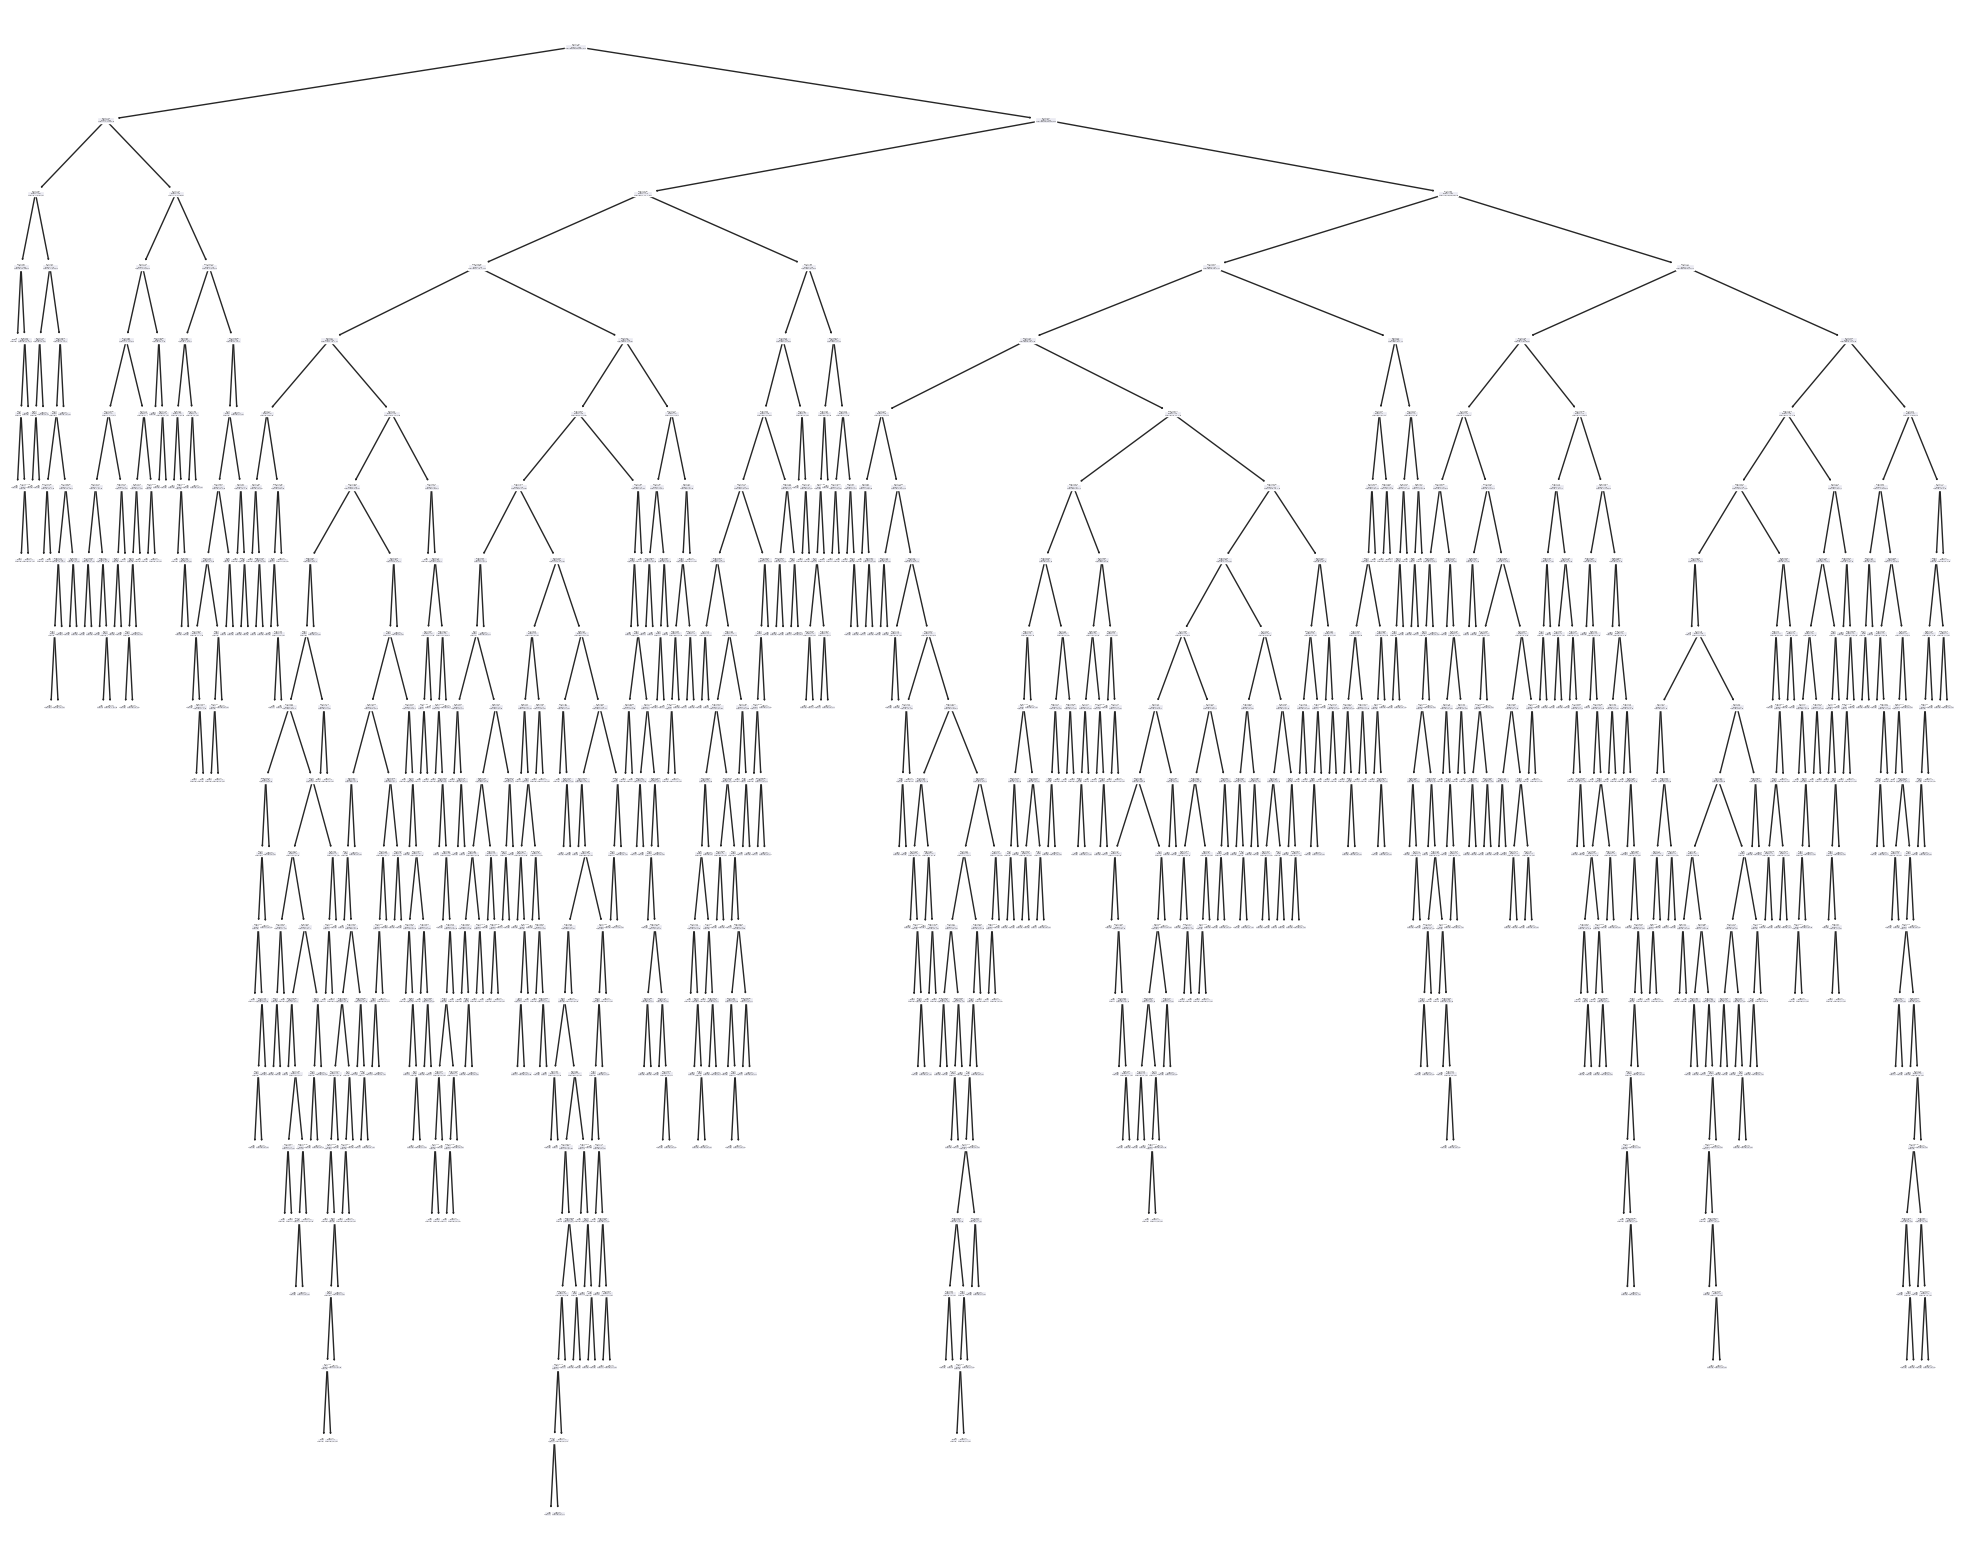

In [94]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_model)
plt.show()

fig.savefig("dt_plot.png")

In [95]:
text_representation = tree.export_text(dt_model)
print(text_representation)

with open("dt_text.log", "w") as fout:
    fout.write(text_representation)

|--- feature_3 <= 0.17
|   |--- feature_3 <= 0.12
|   |   |--- feature_3 <= 0.09
|   |   |   |--- feature_3 <= 0.06
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  0.06
|   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |--- feature_8 <= 1018.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_8 >  1018.50
|   |   |   |   |   |   |--- feature_17 <= 3173.85
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_17 >  3173.85
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |--- class: 4
|   |   |--- feature_3 >  0.09
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- feature_1 <= 0.27
|   |   |   |   |   |--- feature_25 <= 67.40
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_25 >  67.40
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_1 >  0.27
|   |   |   |   |   |--- class: 4
|   |   |   |--- feature_12 >  0.50
|   |   

### Model Evaluation

Now let's get predictions from the model and create a confusion matrix and a classification report.

In [96]:
predictions = dt_model.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [98]:
print("%.3f accuracy" % (accuracy_score(y_test, predictions)))

0.862 accuracy


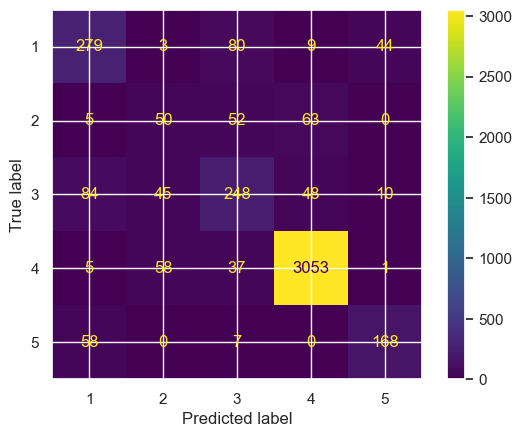

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions)
plt.show()

### Decision Tree Classifier and Pruning

#### GridSearch

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
print(dt_model.get_depth())
print(dt_model.get_n_leaves())

20
517


In [102]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}
estimator_dt = DecisionTreeClassifier(random_state=2022)
grid_dt = GridSearchCV(estimator_dt, param_grid_dt, refit=True, verbose=2)

In [103]:
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

In [104]:
grid_dt_score = grid_dt.score(X_test, y_test)
grid_dt_predictions = grid_dt.predict(X_test)
print(classification_report(y_test,grid_dt_predictions))

              precision    recall  f1-score   support

           1       0.70      0.69      0.69       415
           2       0.34      0.35      0.34       170
           3       0.65      0.62      0.64       435
           4       0.97      0.97      0.97      3154
           5       0.72      0.73      0.73       233

    accuracy                           0.87      4407
   macro avg       0.68      0.67      0.67      4407
weighted avg       0.87      0.87      0.87      4407



In [105]:
print('Accuracy: %.3f%%' % (grid_dt_score * 100))

Accuracy: 87.497%


In [106]:
results = {'DTGridSearchCV': grid_dt_score}

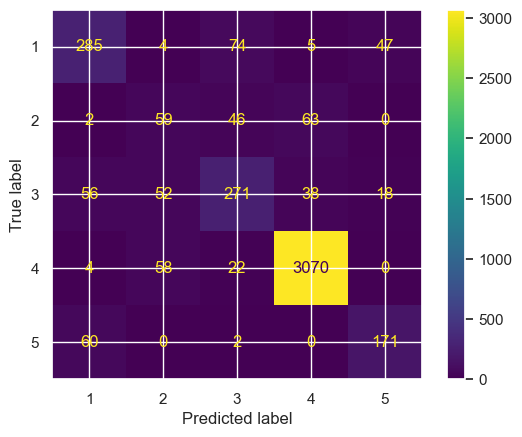

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_dt_predictions)
plt.show()

In [108]:
max_depth = dt_model.get_depth()
max_depth

20

In [109]:
param_grid = {'max_depth': [max_depth for max_depth in range(1, max_depth + 1)]}

In [110]:
estimator = DecisionTreeClassifier(random_state=28)

In [111]:
max_depth_grid_search = GridSearchCV(estimator, param_grid)

In [112]:
max_depth_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=28),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]})

In [113]:
max_depth_grid_search.best_params_

{'max_depth': 7}

In [114]:
max_depth_tree = max_depth_grid_search.best_estimator_
print(max_depth_tree)

DecisionTreeClassifier(max_depth=7, random_state=28)


In [115]:
best_max_depth = max_depth_tree.get_depth()
print(best_max_depth)

7


In [116]:
max_depth_grid_search_score = max_depth_grid_search.score(X_test, y_test)
max_depth_grid_search_predictions = max_depth_grid_search.predict(X_test)
print(classification_report(y_test,max_depth_grid_search_predictions))

              precision    recall  f1-score   support

           1       0.67      0.79      0.72       415
           2       0.40      0.31      0.35       170
           3       0.64      0.61      0.63       435
           4       0.97      0.98      0.97      3154
           5       0.81      0.68      0.74       233

    accuracy                           0.88      4407
   macro avg       0.70      0.67      0.68      4407
weighted avg       0.88      0.88      0.88      4407



In [117]:
print('Accuracy: %.3f%%' % (max_depth_grid_search_score * 100))

Accuracy: 88.110%


In [118]:
results['Max_Depth'] = max_depth_grid_search_score

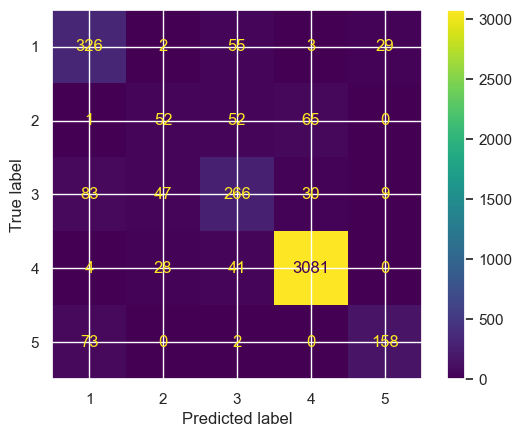

In [119]:
ConfusionMatrixDisplay.from_predictions(y_test, max_depth_grid_search_predictions)
plt.show()

In [120]:
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]
ccp_alphas

array([0.00000000e+00, 1.34496730e-04, 1.36177939e-04, 1.37123619e-04,
       1.37553474e-04, 1.37553474e-04, 1.41221567e-04, 1.41221567e-04,
       1.41852020e-04, 1.41852020e-04, 1.42138590e-04, 1.42408302e-04,
       1.42408302e-04, 1.42408302e-04, 1.42902776e-04, 1.43345199e-04,
       1.44103639e-04, 1.44431148e-04, 1.44431148e-04, 1.44583985e-04,
       1.45004287e-04, 1.45999740e-04, 1.46091276e-04, 1.46653165e-04,
       1.47429108e-04, 1.47790012e-04, 1.48506806e-04, 1.48582536e-04,
       1.49207310e-04, 1.49993092e-04, 1.51234922e-04, 1.51308821e-04,
       1.51308821e-04, 1.51308821e-04, 1.51308821e-04, 1.51308821e-04,
       1.51308821e-04, 1.51308821e-04, 1.51308821e-04, 1.51308821e-04,
       1.51308821e-04, 1.51308821e-04, 1.51308821e-04, 1.51308821e-04,
       1.51308821e-04, 1.51308821e-04, 1.51308821e-04, 1.51308821e-04,
       1.52602059e-04, 1.81570586e-04, 1.81570586e-04, 1.96615982e-04,
       2.01745095e-04, 2.01745095e-04, 2.01745095e-04, 2.01745095e-04,
      

In [121]:
estimator.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [122]:
param_grid = {'ccp_alpha': [alpha for alpha in ccp_alphas]}

In [123]:
estimator_dt = DecisionTreeClassifier(random_state=28)
ccp_alpha_grid_search = GridSearchCV(estimator_dt, param_grid)

In [124]:
ccp_alpha_grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=28),
             param_grid={'ccp_alpha': [0.0, 0.0001344967300482507,
                                       0.00013617793917385386,
                                       0.0001371236193070056,
                                       0.00013755347391298367,
                                       0.00013755347391298367,
                                       0.00014122156655066329,
                                       0.00014122156655066329,
                                       0.00014185201997276442,
                                       0.00014185201997276442,
                                       0.00014213858971008308,
                                       0.00014240830240403018,
                                       0.00014...
                                       0.0001429027756762664,
                                       0.00014334519913037253,
                                       0.00014410363933741152,
                                       0.00014443114760863293,
                                       0.00014443114760863293,
                                       0.00014458398480186952,
                                       0.0001450042870832704,
                                       0.00014599973985500903,
                                       0.0001460912757420653,
                                       0.00014665316526415016,
                                       0.0001474291079375056,
                                       0.00014779001150650817,
                                       0.00014850680609494334,
                                       0.0001485825362357365,
                                       0.00014920730989727833,
                                       0.0001499930924233749, ...]})

In [125]:
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 0.0012292012562436848}

In [126]:
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_
print(best_ccp_alpha_tree)

DecisionTreeClassifier(ccp_alpha=0.0012292012562436848, random_state=28)


In [127]:
ccp_alpha_grid_search_score = ccp_alpha_grid_search.score(X_test, y_test)
ccp_alpha_grid_search_predictions = ccp_alpha_grid_search.predict(X_test)
print(classification_report(y_test,ccp_alpha_grid_search_predictions))

              precision    recall  f1-score   support

           1       0.64      0.74      0.69       415
           2       0.26      0.11      0.15       170
           3       0.64      0.54      0.59       435
           4       0.95      0.99      0.97      3154
           5       0.82      0.69      0.75       233

    accuracy                           0.87      4407
   macro avg       0.66      0.61      0.63      4407
weighted avg       0.85      0.87      0.86      4407



In [128]:
print('Accuracy: %.3f%%' % (ccp_alpha_grid_search_score * 100))

Accuracy: 87.134%


In [129]:
results['ccp_alpha_grid'] = ccp_alpha_grid_search_score

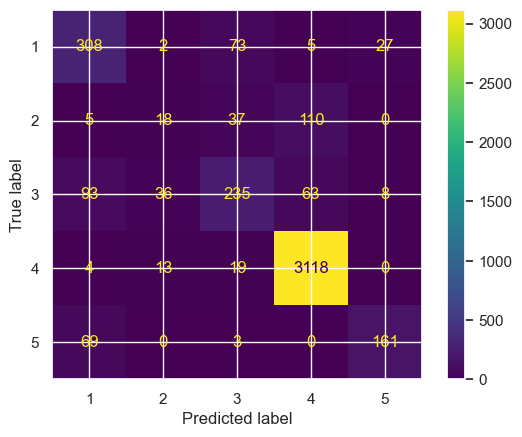

In [130]:
ConfusionMatrixDisplay.from_predictions(y_test, ccp_alpha_grid_search_predictions)
plt.show()

### Bagging (Boostrap Aggregating)

In [131]:
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 40, random_state = 2023)

In [132]:
bg_model = BaggingClassifier(estimator = dt_model, bootstrap= True)

In [133]:
n_estimators = [10, 40, 60, 80, 100, 160]

In [134]:
parameters = {'n_estimators': n_estimators}

In [135]:
grid_bg = GridSearchCV(estimator= bg_model, param_grid= parameters, cv = sss)

In [136]:
grid_bg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=2023, test_size=40,
            train_size=None),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=2022)),
             param_grid={'n_estimators': [10, 40, 60, 80, 100, 160]})

In [137]:
grid_bg_score = grid_bg.score(X_test, y_test)

In [138]:
print("Accuracy: %.3f%%" % (grid_bg_score*100))

Accuracy: 88.359%


In [139]:
grid_bg_predictions = grid_bg.predict(X_test)
print(classification_report(y_test, grid_bg_predictions))

              precision    recall  f1-score   support

           1       0.67      0.79      0.73       415
           2       0.38      0.31      0.34       170
           3       0.66      0.61      0.64       435
           4       0.97      0.98      0.97      3154
           5       0.83      0.69      0.75       233

    accuracy                           0.88      4407
   macro avg       0.70      0.68      0.69      4407
weighted avg       0.88      0.88      0.88      4407



In [140]:
results['Bagg'] = grid_bg_score

### Random Forest

In [141]:
rf_model = RandomForestClassifier(bootstrap= False, max_depth = 15, verbose = 1)

In [142]:
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomForestClassifier(bootstrap=False, max_depth=15, verbose=1)

In [143]:
rf_score = rf_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [144]:
print("Accuracy: %.3f%%" % (rf_score*100))

Accuracy: 88.518%


In [145]:
rf_predictions = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [146]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           1       0.68      0.78      0.73       415
           2       0.48      0.23      0.31       170
           3       0.63      0.70      0.66       435
           4       0.97      0.97      0.97      3154
           5       0.84      0.70      0.76       233

    accuracy                           0.89      4407
   macro avg       0.72      0.68      0.69      4407
weighted avg       0.88      0.89      0.88      4407



In [147]:
results['RF'] = rf_score

### Boosting
#### Gradient Boosting

In [190]:
gbc_model = GradientBoostingClassifier(n_estimators= 100, learning_rate= 1.0, max_depth= 1, random_state= 2024)

In [191]:
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=2024)

In [192]:
gbc_score = gbc_model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (gbc_score*100))

Accuracy: 84.683%


In [193]:
gbc_predictions = gbc_model.predict(X_test)
print(classification_report(y_test, gbc_predictions))

              precision    recall  f1-score   support

           1       0.58      0.65      0.61       415
           2       0.30      0.15      0.20       170
           3       0.57      0.56      0.57       435
           4       0.96      0.97      0.96      3154
           5       0.60      0.59      0.59       233

    accuracy                           0.85      4407
   macro avg       0.60      0.58      0.59      4407
weighted avg       0.84      0.85      0.84      4407



In [194]:
results['GB'] = gbc_score

### Stacking

In [153]:
estimators = [("dt", dt_model), ("rf", rf_model)]

In [154]:
st_model = StackingClassifier(estimators=estimators, final_estimator= LogisticRegression())

In [155]:
st_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(random_state=2022)),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=15,
                                                       verbose=1))],
                   final_estimator=LogisticRegression())

In [156]:
st_score = st_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [157]:
print("Accuraçy: %.3f%%" % (st_score*100))

Accuraçy: 88.722%


In [158]:
st_predictions =st_model.predict(X_test)
print(classification_report(y_test, st_predictions))

              precision    recall  f1-score   support

           1       0.68      0.79      0.73       415
           2       0.51      0.26      0.34       170
           3       0.65      0.68      0.66       435
           4       0.97      0.98      0.97      3154
           5       0.85      0.70      0.76       233

    accuracy                           0.89      4407
   macro avg       0.73      0.68      0.69      4407
weighted avg       0.88      0.89      0.88      4407



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [159]:
results['Stack'] = st_score

## Revisão do que foi feito

<function matplotlib.pyplot.show(close=None, block=None)>

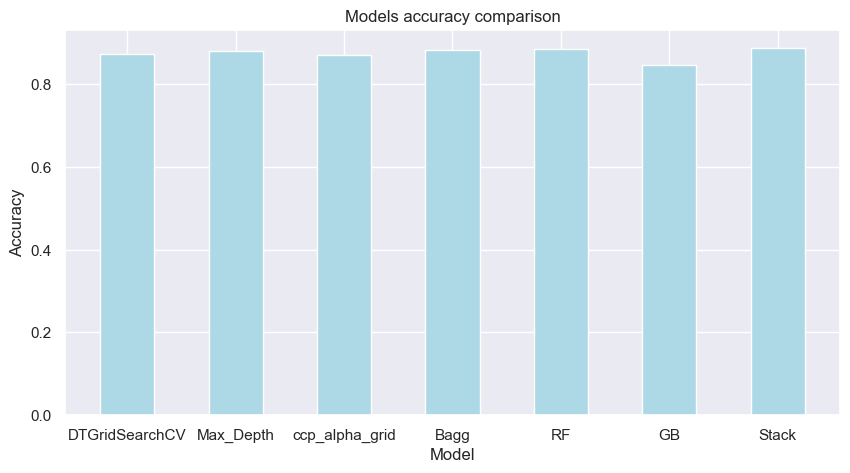

In [160]:
fig = plt.figure(figsize = (10, 5))

mod = list(results.keys())
acc = list(results.values())

plt.bar(mod, acc, color = 'lightblue',
       width= 0.5)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Models accuracy comparison")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

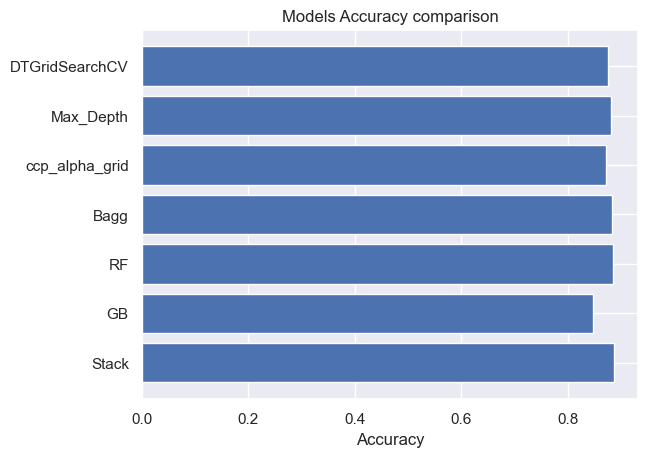

In [161]:
fig, ax = plt.subplots()

y_values = np.arange(len(mod))

ax.barh(y_values, acc, align='center')
ax.set_yticks(y_values, labels = mod)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Models Accuracy comparison')

plt.show

In [162]:
print('Models accuracy comparison')
for key, value in results.items():
    print("%s \t %.3f%%" % (key, value))

Models accuracy comparison
DTGridSearchCV 	 0.875%
Max_Depth 	 0.881%
ccp_alpha_grid 	 0.871%
Bagg 	 0.884%
RF 	 0.885%
GB 	 0.847%
Stack 	 0.887%


Escrever aqui alguma coisa

In [163]:
assert df_merged_3['date'].isnull().sum() == 0, 'missing record rate'
df_merged_3['date_year'] = df_merged_3['date'].dt.year
df_merged_3['date_month'] = df_merged_3['date'].dt.month
df_merged_3['date_day'] = df_merged_3['date'].dt.day

In [164]:
labels = df_merged_3['Injecao na rede (kWh)'].astype('category').cat.categories.tolist()
replace_map_comp = {'Injecao na rede (kWh)' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)

{'Injecao na rede (kWh)': {'None': 1}}


In [165]:
df_merged_3.replace(replace_map_comp, inplace=True)
df_merged_3

,date,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),date_year,date_month,date_day
0,2023-01-01,0,0.000,0.467,0.000,1,12.93,12.76,12.720000,13.430000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
1,2023-01-01,1,0.000,0.577,0.000,1,13.49,13.38,13.430000,13.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
2,2023-01-01,2,0.000,0.346,0.000,1,13.55,13.44,13.480000,14.820000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
3,2023-01-01,3,0.000,0.270,0.000,1,13.61,13.51,12.010000,14.820000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
4,2023-01-01,4,0.000,0.252,0.000,1,13.59,13.49,12.010000,14.820000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,2023-04-04,19,0.953,0.000,0.012,1,20.10,18.10,18.524397,21.019201,...,270.4,121.7,0.0,0.0,0.0,0.0,0.0,2023,4,4
2252,2023-04-04,20,0.915,0.000,0.000,1,13.60,11.50,12.024397,14.519201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2253,2023-04-04,21,0.479,0.000,0.000,1,12.60,10.60,11.024397,13.519201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2254,2023-04-04,22,0.000,0.497,0.000,1,11.70,9.50,10.124397,12.619201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4


In [166]:
value_counts = df_merged_3['Injecao na rede (kWh)'].value_counts(dropna=False)
print(value_counts)

Injecao na rede (kWh)
1    2256
Name: count, dtype: int64


In [167]:
df_merged_3.drop('date',axis=1,inplace=True)
df_merged_3

,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),date_year,date_month,date_day
0,0,0.000,0.467,0.000,1,12.93,12.76,12.720000,13.430000,1019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
1,1,0.000,0.577,0.000,1,13.49,13.38,13.430000,13.900000,1018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
2,2,0.000,0.346,0.000,1,13.55,13.44,13.480000,14.820000,1017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
3,3,0.000,0.270,0.000,1,13.61,13.51,12.010000,14.820000,1016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
4,4,0.000,0.252,0.000,1,13.59,13.49,12.010000,14.820000,1015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,19,0.953,0.000,0.012,1,20.10,18.10,18.524397,21.019201,992.6,...,270.4,121.7,0.0,0.0,0.0,0.0,0.0,2023,4,4
2252,20,0.915,0.000,0.000,1,13.60,11.50,12.024397,14.519201,993.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2253,21,0.479,0.000,0.000,1,12.60,10.60,11.024397,13.519201,993.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2254,22,0.000,0.497,0.000,1,11.70,9.50,10.124397,12.619201,994.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4


In [168]:
X_2023 = df_merged_3.drop(['Injecao na rede (kWh)'], axis=1)
feature_order = X_train.columns.tolist()
X_2023_reordered = X_2023[feature_order]

### Modelo Bagging

In [195]:
predictions_2023 = grid_bg.predict(X_2023_reordered)
df_merged_3['Injecao na rede (kWh)'] = predictions_2023
df_merged_3

,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),date_year,date_month,date_day
0,0,0.000,0.467,0.000,4,12.93,12.76,12.720000,13.430000,1019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
1,1,0.000,0.577,0.000,4,13.49,13.38,13.430000,13.900000,1018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
2,2,0.000,0.346,0.000,4,13.55,13.44,13.480000,14.820000,1017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
3,3,0.000,0.270,0.000,4,13.61,13.51,12.010000,14.820000,1016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
4,4,0.000,0.252,0.000,4,13.59,13.49,12.010000,14.820000,1015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,19,0.953,0.000,0.012,4,20.10,18.10,18.524397,21.019201,992.6,...,270.4,121.7,0.0,0.0,0.0,0.0,0.0,2023,4,4
2252,20,0.915,0.000,0.000,4,13.60,11.50,12.024397,14.519201,993.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2253,21,0.479,0.000,0.000,4,12.60,10.60,11.024397,13.519201,993.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2254,22,0.000,0.497,0.000,4,11.70,9.50,10.124397,12.619201,994.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4


In [196]:
value_counts = df_merged_3['Injecao na rede (kWh)'].value_counts(dropna=False)
print(value_counts)

Injecao na rede (kWh)
4    1645
3     242
1     242
2      64
5      63
Name: count, dtype: int64


/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


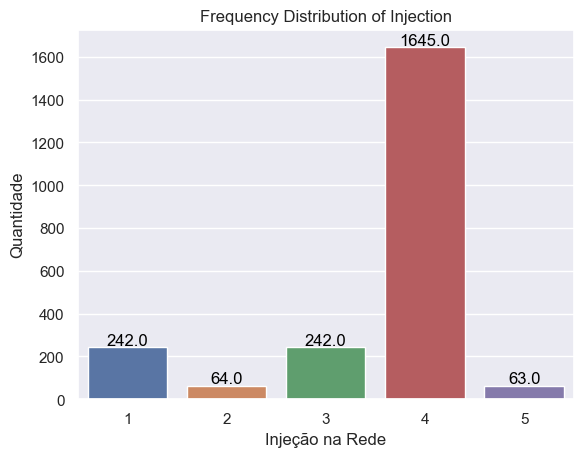

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

injecao_count = df_merged_3['Injecao na rede (kWh)'].value_counts()
sns.set(style='darkgrid')
barplot = sns.barplot(x=injecao_count.index, y=injecao_count.values)

for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.title('Frequency Distribution of Injection')
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Injeção na Rede', fontsize=12)
plt.show()

### Modelo Random Forest

In [172]:
predictions_2023 = rf_model.predict(X_2023_reordered)
df_merged_3['Injecao na rede (kWh)'] = predictions_2023
df_merged_3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),date_year,date_month,date_day
0,0,0.000,0.467,0.000,4,12.93,12.76,12.720000,13.430000,1019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
1,1,0.000,0.577,0.000,4,13.49,13.38,13.430000,13.900000,1018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
2,2,0.000,0.346,0.000,4,13.55,13.44,13.480000,14.820000,1017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
3,3,0.000,0.270,0.000,4,13.61,13.51,12.010000,14.820000,1016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
4,4,0.000,0.252,0.000,4,13.59,13.49,12.010000,14.820000,1015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,19,0.953,0.000,0.012,4,20.10,18.10,18.524397,21.019201,992.6,...,270.4,121.7,0.0,0.0,0.0,0.0,0.0,2023,4,4
2252,20,0.915,0.000,0.000,4,13.60,11.50,12.024397,14.519201,993.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2253,21,0.479,0.000,0.000,4,12.60,10.60,11.024397,13.519201,993.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2254,22,0.000,0.497,0.000,4,11.70,9.50,10.124397,12.619201,994.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4


/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


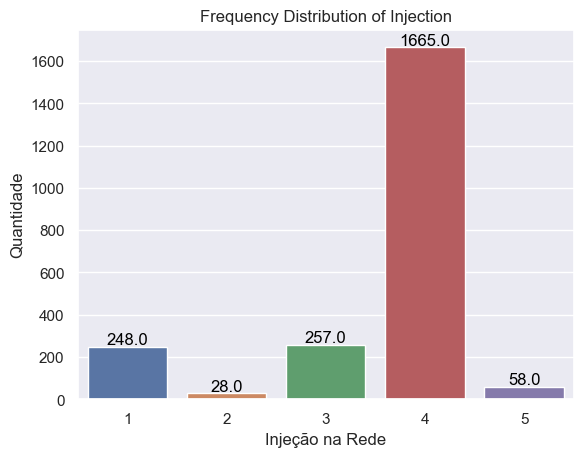

In [173]:
injecao_count = df_merged_3['Injecao na rede (kWh)'].value_counts()
sns.set(style='darkgrid')
barplot = sns.barplot(x=injecao_count.index, y=injecao_count.values)

for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.title('Frequency Distribution of Injection')
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Injeção na Rede', fontsize=12)

plt.show()

### Modelo Stacking

In [174]:
predictions_2023 = st_model.predict(X_2023_reordered)
df_merged_3['Injecao na rede (kWh)'] = predictions_2023
df_merged_3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


,hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,...,direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),date_year,date_month,date_day
0,0,0.000,0.467,0.000,4,12.93,12.76,12.720000,13.430000,1019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
1,1,0.000,0.577,0.000,4,13.49,13.38,13.430000,13.900000,1018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
2,2,0.000,0.346,0.000,4,13.55,13.44,13.480000,14.820000,1017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
3,3,0.000,0.270,0.000,4,13.61,13.51,12.010000,14.820000,1016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
4,4,0.000,0.252,0.000,4,13.59,13.49,12.010000,14.820000,1015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,19,0.953,0.000,0.012,4,20.10,18.10,18.524397,21.019201,992.6,...,270.4,121.7,0.0,0.0,0.0,0.0,0.0,2023,4,4
2252,20,0.915,0.000,0.000,4,13.60,11.50,12.024397,14.519201,993.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2253,21,0.479,0.000,0.000,4,12.60,10.60,11.024397,13.519201,993.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4
2254,22,0.000,0.497,0.000,4,11.70,9.50,10.124397,12.619201,994.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,4,4


In [175]:
value_counts = df_merged_3['Injecao na rede (kWh)'].value_counts(dropna=False)
print(value_counts)

Injecao na rede (kWh)
4    1670
3     259
1     239
5      57
2      31
Name: count, dtype: int64


/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/afonsoni/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


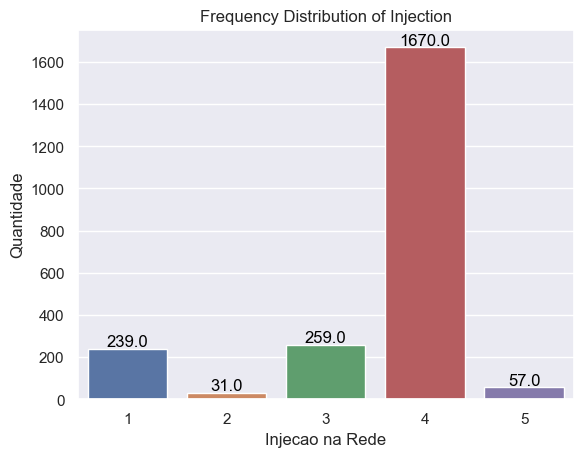

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

injecao_count = df_merged_3['Injecao na rede (kWh)'].value_counts()
sns.set(style='darkgrid')
barplot = sns.barplot(x=injecao_count.index, y=injecao_count.values)

for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.title('Frequency Distribution of Injection')
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Injecao na Rede', fontsize=12)
plt.show()

## Guardar no dummy_submissions

In [198]:
df_submission.iloc[:, 1] = df_merged_3['Injecao na rede (kWh)'].values
df_submission

,RowId,Result
0,1,4
1,2,4
2,3,4
3,4,4
4,5,4
...,...,...
2251,2252,4
2252,2253,4
2253,2254,4
2254,2255,4


In [199]:
reverse_mapping_dict = {
    1: 'High',
    2: 'Low',
    3: 'Medium',
    4: 'None',
    5: 'Very High'
}

df_submission['Result'] = df_submission['Result'].replace(reverse_mapping_dict)
df_submission

,RowId,Result
0,1,None
1,2,None
2,3,None
3,4,None
4,5,None
...,...,...
2251,2252,None
2252,2253,None
2253,2254,None
2254,2255,None


In [200]:
# Guardar no ficheiro 'dummy_submission.csv'
df_submission.replace({None: 'None', np.nan: 'None'}, inplace=True)
df_submission.to_csv('./datasets/dummy_submission.csv', index=False)